In [137]:
import numpy as np
import pandas as pd
import re

In [138]:
rows = [
    'se1_week_1',
    'se1_week_2',
    'se1_week_3',
    'se1_week_4',
    'se1_week_5',
    'se1_week_6',
    'se1_week_7',
    'se1_week_8',
    'se1_week_9',
    'se1_week_10',
    'se1_week_11',
    'se1_week_12',
    'se1_week_13',
    'se1_week_14',
    'se1_week_15',
    'se1_week_16',

    'se2_week_1',
    'se2_week_2',
    'se2_week_3',
    'se2_week_4',
    'se2_week_5',
    'se2_week_6',
    'se2_week_7',
    'se2_week_8',
    'se2_week_9',
    'se2_week_10',
    'se2_week_11',
    'se2_week_12',
    'se2_week_13',
    'se2_week_14',
    'se2_week_15',
    'se2_week_16'   
]


columns = [
    'Total_LMS',
    'At_risk_LMS',
    'Total_LIB',
    'At_risk_LIB'
]

Data_statistical = pd.DataFrame(np.random.rand(32,4), index=rows, columns=columns).fillna(0)
Data_statistical

,Total_LMS,At_risk_LMS,Total_LIB,At_risk_LIB
se1_week_1,0.918040,0.406529,0.710784,0.337064
se1_week_2,0.322255,0.883100,0.198682,0.158977
se1_week_3,0.188352,0.107828,0.277797,0.022961
se1_week_4,0.327612,0.895929,0.543016,0.224944
se1_week_5,0.137814,0.662864,0.632963,0.895400
se1_week_6,0.655798,0.600573,0.980186,0.683610
se1_week_7,0.822130,0.754878,0.312764,0.558915
se1_week_8,0.232469,0.887083,0.009553,0.756618
se1_week_9,0.597552,0.096042,0.774888,0.734644
se1_week_10,0.376905,0.583985,0.478189,0.597092


In [139]:
# add lms
data_path_list = [
    'DR0008_activity_accumulator_2016_09.csv',
    'DR0008_activity_accumulator_2016-10.csv',
    'DR0008_activity_accumulator_2016-11.csv',
    'DR0008_activity_accumulator_2016-12.csv',
    'DR0008_activity_accumulator_2017-02.csv',
    'DR0008_activity_accumulator_2017-03.csv',
    'DR0008_activity_accumulator_2017-04.csv',
    'DR0008_activity_accumulator_2017-05.csv'
]

se1_at_risks = pd.read_csv('Std_list_atRist_2016_se1.csv')
se1_at_risks = se1_at_risks.rename(columns={'MASKED_STUDENT_ID':'De-id', 'CUM_GPA':'CUM_GPA'})

se2_at_risks = pd.read_csv('Std_list_atRist_2016_se2.csv')
se2_at_risks = se2_at_risks.rename(columns={'MASKED_STUDENT_ID':'De-id', 'CUM_GPA':'CUM_GPA'})

total_LMS = []
at_risk_LMS = []

index = 0
for path in data_path_list:
    print(index)
    df = pd.read_csv(path, sep='\t')
    dt = pd.to_datetime(df['timestamp'])
    
    test = dt.apply(lambda x: 1 if x.day >=1 and x.day <=7 else 0)
    total_LMS.append([test.sum()])
    
    test = dt.apply(lambda x: 1 if x.day >=8 and x.day <=15 else 0)
    total_LMS.append([test.sum()])
    
    test = dt.apply(lambda x: 1 if x.day >=16 and x.day <=23 else 0)
    total_LMS.append([test.sum()])
    
    test = dt.apply(lambda x: 1 if x.day >=24 and x.day <=32 else 0)
    total_LMS.append([test.sum()])
    
    if index < 4:
        df = pd.merge(df, se1_at_risks, on='De-id', how='right')
    else:
        df = pd.merge(df, se2_at_risks, on='De-id', how='right')
    
    dt = pd.to_datetime(df['timestamp'])
    test = dt.apply(lambda x: 1 if x.day >=1 and x.day <=7 else 0)
    at_risk_LMS.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.day >=8 and x.day <=15 else 0)
    at_risk_LMS.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.day >=16 and x.day <=23 else 0)
    at_risk_LMS.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.day >=24 and x.day <=32 else 0)
    at_risk_LMS.append([test.sum()])
    
    index += 1

total_LMS = np.array(total_LMS)
Data_statistical['Total_LMS'] = total_LMS
at_risk_LMS = np.array(at_risk_LMS)
Data_statistical['At_risk_LMS'] = at_risk_LMS
Data_statistical

0
1
2
3
4
5
6
7


,Total_LMS,At_risk_LMS,Total_LIB,At_risk_LIB
se1_week_1,5008338,82429,0.710784,0.337064
se1_week_2,7315455,153269,0.198682,0.158977
se1_week_3,6901651,154446,0.277797,0.022961
se1_week_4,6978122,153795,0.543016,0.224944
se1_week_5,6786573,157468,0.632963,0.895400
se1_week_6,6917831,164800,0.980186,0.683610
se1_week_7,8197995,165056,0.312764,0.558915
se1_week_8,8332744,199054,0.009553,0.756618
se1_week_9,7300965,186066,0.774888,0.734644
se1_week_10,8484064,179234,0.478189,0.597092


In [140]:
Data_statistical.sum()

Total_LMS      1.864270e+08
At_risk_LMS    3.644216e+06
Total_LIB      1.489081e+01
At_risk_LIB    1.755652e+01
dtype: float64

In [141]:
se1_at_risks = pd.read_csv('Std_list_atRist_2016_se1.csv')
se1_at_risks = se1_at_risks.rename(columns={'MASKED_STUDENT_ID':'comp_masked_net_id', 'CUM_GPA':'CUM_GPA'})
se2_at_risks = pd.read_csv('Std_list_atRist_2016_se2.csv')
se2_at_risks = se2_at_risks.rename(columns={'MASKED_STUDENT_ID':'comp_masked_net_id', 'CUM_GPA':'CUM_GPA'})


total_lib = []
at_risk_lib = []

df_2016_lib = pd.read_csv('Gate_2016_deidentiy_filtered.csv')
months = [9, 10, 11, 12]

for mon in months:
    dt = pd.to_datetime(df_2016_lib['Column 1'])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=1 and x.day <=7 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=8 and x.day <=15 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=16 and x.day <=23 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=24 and x.day <=32 else 0)
    total_lib.append([test.sum()])

    df = pd.merge(df_2016_lib, se1_at_risks, on='comp_masked_net_id', how='right')
    dt = pd.to_datetime(df['Column 1'])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=1 and x.day <=7 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=8 and x.day <=15 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=16 and x.day <=23 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=24 and x.day <=32 else 0)
    at_risk_lib.append([test.sum()])


df_2017_lib = pd.read_csv('Gate_2017_deidentiy_filtered.csv')
months = [2, 3, 4, 5]

for mon in months:
    dt = pd.to_datetime(df_2017_lib['Column 1'])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=1 and x.day <=7 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=8 and x.day <=15 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=16 and x.day <=23 else 0)
    total_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=24 and x.day <=32 else 0)
    total_lib.append([test.sum()])

    df = pd.merge(df_2017_lib, se2_at_risks, on='comp_masked_net_id', how='right')
    dt = pd.to_datetime(df['Column 1'])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=1 and x.day <=7 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=8 and x.day <=15 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=16 and x.day <=23 else 0)
    at_risk_lib.append([test.sum()])
    test = dt.apply(lambda x: 1 if x.month == mon and x.day >=24 and x.day <=32 else 0)
    at_risk_lib.append([test.sum()])

total_lib = np.array(total_lib)
Data_statistical['Total_LIB'] = total_lib
at_risk_lib = np.array(at_risk_lib)
Data_statistical['At_risk_LIB'] = at_risk_lib
Data_statistical

,Total_LMS,At_risk_LMS,Total_LIB,At_risk_LIB
se1_week_1,5008338,82429,25667,474
se1_week_2,7315455,153269,46163,924
se1_week_3,6901651,154446,44051,924
se1_week_4,6978122,153795,47719,906
se1_week_5,6786573,157468,47619,1012
se1_week_6,6917831,164800,46427,1109
se1_week_7,8197995,165056,48161,960
se1_week_8,8332744,199054,64267,1372
se1_week_9,7300965,186066,52902,1371
se1_week_10,8484064,179234,59463,1272


In [157]:
se1_at_risks

,comp_masked_net_id,CUM_GPA
0,P5D4NOGJ,1.40
1,IBHEHSIE,1.75
2,KSHXX7FK,1.75
3,RQ9ERG37,1.91
4,XOWI6BMY,2.00
...,...,...
386,YNKV84XW,1.72
387,DVW15LZ5,1.50
388,QV962CBO,1.97
389,U6LHQMJM,1.88


In [142]:
se1 = Data_statistical.head(13)
se2 = Data_statistical.iloc[16:29]
New_Data = pd.concat([se1, se2])
New_Data

,Total_LMS,At_risk_LMS,Total_LIB,At_risk_LIB
se1_week_1,5008338,82429,25667,474
se1_week_2,7315455,153269,46163,924
se1_week_3,6901651,154446,44051,924
se1_week_4,6978122,153795,47719,906
se1_week_5,6786573,157468,47619,1012
se1_week_6,6917831,164800,46427,1109
se1_week_7,8197995,165056,48161,960
se1_week_8,8332744,199054,64267,1372
se1_week_9,7300965,186066,52902,1371
se1_week_10,8484064,179234,59463,1272


In [151]:
New_Data.columns = columns

In [153]:
New_Data['Normal_LMS'] = New_Data['Total_LMS'] - New_Data['At_risk_LMS']
New_Data['Normal_LIB'] = New_Data['Total_LIB'] - New_Data['At_risk_LIB']
New_Data = New_Data[['Total_LMS', 'Normal_LMS', 'At_risk_LMS', 'Total_LIB', 'Normal_LIB', 'At_risk_LIB']]
New_Data

,Total_LMS,Normal_LMS,At_risk_LMS,Total_LIB,Normal_LIB,At_risk_LIB
se1_week_1,5008338,4925909,82429,25667,25193,474
se1_week_2,7315455,7162186,153269,46163,45239,924
se1_week_3,6901651,6747205,154446,44051,43127,924
se1_week_4,6978122,6824327,153795,47719,46813,906
se1_week_5,6786573,6629105,157468,47619,46607,1012
se1_week_6,6917831,6753031,164800,46427,45318,1109
se1_week_7,8197995,8032939,165056,48161,47201,960
se1_week_8,8332744,8133690,199054,64267,62895,1372
se1_week_9,7300965,7114899,186066,52902,51531,1371
se1_week_10,8484064,8304830,179234,59463,58191,1272


In [154]:
New_Data.sum()

Total_LMS      170068181
Normal_LMS     166823442
At_risk_LMS      3244739
Total_LIB        1174200
Normal_LIB       1153910
At_risk_LIB        20290
dtype: int64

In [155]:
se1 = New_Data.head(13)
se2 = New_Data.tail(13)
print(se1.sum())
print('')
print(se2.sum())

Total_LMS      98174619
Normal_LMS     95949014
At_risk_LMS     2225605
Total_LIB        650398
Normal_LIB       636353
At_risk_LIB       14045
dtype: int64

Total_LMS      71893562
Normal_LMS     70874428
At_risk_LMS     1019134
Total_LIB        523802
Normal_LIB       517557
At_risk_LIB        6245
dtype: int64


In [109]:
Data_statistical.tail(16).sum()

Total_LMS      77028909
At_risk_LMS     1097375
Total_LIB        572736
At_risk_LIB       11692
dtype: int64

In [112]:
186426976/122/(391+225)

49.283685970880306

In [111]:
(2546841/122/391 + 1097375/120/225)/2

47.01708649920727

In [41]:
New_Data.sum()

Total_LMS      170068181
At_risk_LMS      3244739
Total_LIB        1174200
At_risk_LIB        24721
dtype: int64

In [163]:
t=1
print(se1['At_risk_LMS'].head(t).sum()/se1['At_risk_LMS'].sum())
print(se1['Normal_LMS'].head(t).sum()/se1['Normal_LMS'].sum())
print()
print(se1['At_risk_LIB'].head(t).sum()/se1['At_risk_LIB'].sum())
print(se1['Normal_LIB'].head(t).sum()/se1['Normal_LIB'].sum())
print()
print(se2['At_risk_LMS'].head(t).sum()/se2['At_risk_LMS'].sum())
print(se2['Normal_LMS'].head(t).sum()/se2['Normal_LMS'].sum())
print()
print(se2['At_risk_LIB'].head(t).sum()/se2['At_risk_LIB'].sum())
print(se2['Normal_LIB'].head(t).sum()/se2['Normal_LIB'].sum())
print()

0.037036670927680336
0.0513388183436674

0.033748665005339976
0.0395896617129172

0.03594914898335253
0.04338633956947067

0.032185748598879106
0.03265340822363527



In [71]:
se1.sum()

Total_LMS      98174619
At_risk_LMS     2225605
Total_LIB        650398
At_risk_LIB       14045
dtype: int64

In [97]:
se2.head(2).sum()

Total_LMS      8800618
At_risk_LMS     109368
Total_LIB        56922
At_risk_LIB       1147
dtype: int64

In [77]:
se2.sum()

Total_LMS      71893562
At_risk_LMS     1019134
Total_LIB        523802
At_risk_LIB       10676
dtype: int64

In [98]:
# total LMS

((12323793/98174619)+(8800618/71893562))/2

0.1239705429388738

In [99]:
# at-risk LMS

((235698/2225605)+(109368/1019134))/2

0.10660876548672692

In [100]:
# total LIB

((71830/650398)+(56922/523802))/2

0.10955545131975632

In [101]:
# at-risk LIB

((1398/14045)+(1147/10676))/2

0.10348722213204066

In [50]:
se2.head(4).sum()

Total_LMS      18352044
At_risk_LMS      250752
Total_LIB        127849
At_risk_LIB        2564
dtype: int64

In [51]:
170068181/15503/(99)/2

55.40412868933156

In [52]:
1174200/15503/(99)/2

0.38252615818248276

In [56]:
(2225605/391/(99) + 1019134/225/(99))/2

51.62408506778498

In [54]:
(14045/391/(99) + 10676/225/(99))/2

0.42105861111828713

In [67]:
(1305211)/15503/(122)/2

0.3450445339505944

In [58]:
(543939+250752)/15503/(31)/2

0.8267817051018221

In [ ]:
3111619	36637	17101	379
5688999	72731	39821	768
5838113	89963	45154	861
3713313	51421	25773	556

In [68]:
1305211/15503/122/2

0.3450445339505944

In [69]:
28005/(391)/122/2

0.2935411513144103

In [14]:
3111619+5688999+5838113+3713313

18352044

In [20]:
(18352044+26203566)/15503/31/2

46.35482622510107

In [22]:
(543939/(391)/31 + 250752/225/31)/2

40.41293017627808

In [21]:
(163600+(17101+39821+45154+25773))/15503/31/2

0.3032181076295327

In [26]:
3228/391/31

0.2663146605065589

In [27]:
163600/15503/31

0.34041278170926337

In [28]:
26203566/15503/31

54.523403378742515

In [29]:
(36637+72731+89963+51421)/391/31

20.687402029535516

In [191]:
Data_statistical.to_csv('Data_statistical.csv')

In [2]:
Data_statistical = pd.read_csv('Data_statistical.csv', index_col=0)
Data_statistical

,Total_LMS,At_risk_LMS,Total_LIB,At_risk_LIB
se1_week_1,5008338,82429,25667,474
se1_week_2,7315455,153269,46163,924
se1_week_3,6901651,154446,44051,924
se1_week_4,6978122,153795,47719,906
se1_week_5,6786573,157468,47619,1012
se1_week_6,6917831,164800,46427,1109
se1_week_7,8197995,165056,48161,960
se1_week_8,8332744,199054,64267,1372
se1_week_9,7300965,186066,52902,1371
se1_week_10,8484064,179234,59463,1272


In [4]:
Data_statistical.sum()

Total_LMS      186426976
At_risk_LMS      3644216
Total_LIB        1305211
At_risk_LIB        28005
dtype: int64

In [8]:
 186426976/122/(391+225)/2

0.18632238662976366

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style("whitegrid")  
%matplotlib inline

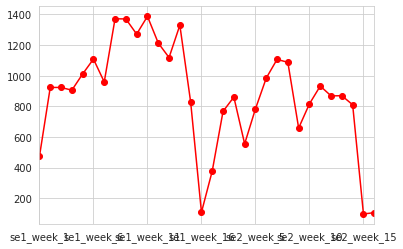

In [6]:
fig1, ax_lst = plt.subplots(1,1)
Data_statistical['At_risk_LIB'].plot(style='-o',color='r')

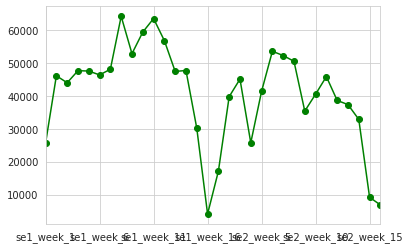

In [7]:
fig2, ax_lst = plt.subplots(1,1)
Data_statistical['Total_LIB'].plot(style='-o',color='g')

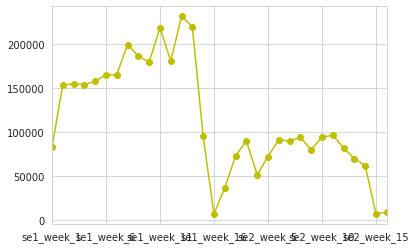

In [8]:
fig3, ax_lst = plt.subplots(1,1)
Data_statistical['At_risk_LMS'].plot(style='-o',color='y')

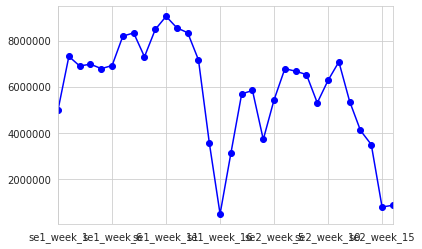

In [9]:
fig4, ax_lst = plt.subplots(1,1)
Data_statistical['Total_LMS'].plot(style='-o',color='b')

In [17]:
## 前14周作为一学期的数据

temp_list = Data_statistical['Total_LMS']
a = float(temp_list[:7].sum())/temp_list[:14].sum()
b = float(temp_list[14:21].sum())/temp_list[14:28].sum()
print(a, b, (a+b)/2.0)
temp_list = Data_statistical['At_risk_LMS']
a = float(temp_list[:7].sum())/temp_list[:14].sum()
b = float(temp_list[14:21].sum())/temp_list[14:28].sum()
print(a, b, (a+b)/2.0)
temp_list = Data_statistical['Total_LIB']
a = float(temp_list[:7].sum())/temp_list[:14].sum()
b = float(temp_list[14:21].sum())/temp_list[14:28].sum()
print(a, b, (a+b)/2.0)
temp_list = Data_statistical['At_risk_LIB']
a = float(temp_list[:7].sum())/temp_list[:14].sum()
b = float(temp_list[14:21].sum())/temp_list[14:28].sum()
print(a, b, (a+b)/2.0)

0.45667098966236475 0.3875392571358001 0.42210512339908246
0.4218082656608021 0.40387867328868354 0.4128434694747428
0.43801034987030435 0.3909852987776188 0.41449782432396154
0.4103414634146341 0.3989203276247208 0.40463089551967746


In [118]:
se1 = New_Data.head(13)
se2 = New_Data.tail(13)
print(se1.sum())

print(se2.sum())

Total_LMS      98174619
Normal_LMS     95949014
At_risk_LMS     2225605
Total_LIB        650398
Normal_LIB       636353
At_risk_LIB       14045
dtype: int64
Total_LMS      71893562
Normal_LMS     70874428
At_risk_LMS     1019134
Total_LIB        523802
Normal_LIB       513126
At_risk_LIB       10676
dtype: int64


In [135]:
513126/15278

33.58594056813719

In [133]:
1019134/225

4529.484444444444